# Deep Learning for Function Estimation
### Amir, 2025, NUS SoC ACE

#### We'll try to estimate the quality of red wine samples based on their physical and chemical features
#### We compute and report the mean absolute error, MAE

In [1]:
# CNN version
# Regression Example With wine dataset ...
import pandas as pd
from pandas import read_csv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# mounting the Google drive
#from google.colab import drive

#drive.mount('/content/drive')

# Load the dataset
fp = "sample_data/wine_r2_t.csv"

In [3]:

# load dataset to a Pandas dataframe
dataframe = read_csv(fp)
# copy only values to a numpy n dimensional array, ndarray
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:,0:11]
Y = dataset[:,11]

print(X.shape)
X = X.reshape(X.shape[0], X.shape[1], 1)
print(X.shape)


(1599, 11)
(1599, 11, 1)


In [4]:
print(type(dataset))
print(dataset.shape)
print(dataframe.describe())
print( dataframe.head() )

<class 'numpy.ndarray'>
(1599, 12)
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.0

In [24]:
# define base model, a deep covolutional one
# structure comprisses 2 1d convolution layers with 16 and 12 filters, filters are 3x1
# then maxpooling for downsampling, a fully connected dense layer with 12 neurons
# Droput layer with 20% at the end
#
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv1D(16, 3, activation="relu", input_shape=(11,1)))
    model.add(Conv1D(12, 3, activation="relu"))
    # model.add(Conv1D(12, 3, activation="relu"))
    # model.add(Conv1D(12, 3, activation="relu"))
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dense(12, input_dim=8, kernel_initializer='normal', activation='relu'))
    # model.add(Dense(12, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add( Dropout(0.2) )
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


In [25]:
# splitting the train and test subsets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [31]:
#Normalizing before training
from sklearn.preprocessing import StandardScaler

# Create scalers
scaler_X = StandardScaler()
scaler_y = StandardScaler()
print(X_train.shape, Y_train.shape)

# Standardize X_train and X_test
X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1,1))
X_test_scaled = scaler_X.transform(X_test.reshape(-1,1))

# Standardize Y_train and Y_test (only if y is continuous, e.g., in regression)
y_train_scaled = scaler_y.fit_transform(Y_train.reshape(-1, 1))  # Reshape if needed
y_test_scaled = scaler_y.transform(Y_test.reshape(-1, 1))

print(X_test_scaled)

(1279, 11, 1) (1279,)
[[ 0.15242914]
 [-0.45544487]
 [-0.45779869]
 ...
 [-0.29067747]
 [-0.45073723]
 [ 0.24069739]]


In [32]:
# training the model for 900 epochs and testing the trained model with the training data
# we report the training error
estimator = baseline_model()
estimator.fit(X_train, Y_train, epochs=900) #, verbose=2)
prediction = estimator.predict(X_train)

train_error =  np.abs(Y_train - prediction)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)

#errors_900e = {'mean_error': 0.7567545841717962, 'min_error': 1.5735626220703125e-05, 'max_error': 4.68697452545166, 'std_error': 0.5484988882539626}
#errors_1400e = {'mean_error': 0.7770158300452301, 'min_error': 0.00022172927856445312, 'max_error': 4.597951889038086, 'std_error': 0.5743109403743879}
#errors_6000e = {'mean_error': 0.8302297544675866, 'min_error': 0.0005440711975097656, 'max_error': 4.9738874435424805, 'std_error': 0.6178575220360497}
#errors_900e_extra_layers = {'mean_error': 0.7931222524908093, 'min_error': 0.00038051605224609375, 'max_error': 4.743759632110596, 'std_error': 0.5878591892747502}
#errors_6000epoch_extra_layers = {'mean_error': 0.8139168084013867, 'min_error': 0.0007600784301757812,
#        'max_error': 4.933640480041504, 'std_error': 0.6463590400625326}
#errors_900e_normalized = {'mean_error': 0.7570594025360003, 'min_error': 0.00016546249389648438, 'max_error': 4.461119651794434, 'std_error': 0.5439035402706444}

print('\nTraining results:\nmean=',mean_error,'\nmin=',min_error,'\nmax=',max_error,'\nstd=',std_error)

Epoch 1/900


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 30.1735
Epoch 2/900
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.8514
Epoch 3/900
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.6782
Epoch 4/900
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.0678
Epoch 5/900
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2238
Epoch 6/900
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6122
Epoch 7/900
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0300
Epoch 8/900
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6590
Epoch 9/900
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9534
Epoch 10/900
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7726
Epoch 11/900
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0431
Epoch 12/900
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1116
Epoch 13/900
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1613
Epoch 14/900
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9862
Epoch 15/900
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9929
Epoch 16/900

In [33]:
# showing the real and predicted quality scores for the training data
df = pd.DataFrame({'Actual': Y_train, 'Predicted': prediction.ravel() })
df1 = df.tail(25)
print(df1)

      Actual  Predicted
1254     6.0   5.557457
1255     6.0   5.447727
1256     5.0   5.293700
1257     5.0   5.785996
1258     6.0   5.187976
1259     5.0   5.587514
1260     5.0   5.680928
1261     5.0   5.662479
1262     6.0   5.949671
1263     6.0   6.420179
1264     5.0   5.324003
1265     5.0   5.941566
1266     5.0   5.549079
1267     4.0   5.227578
1268     5.0   5.507891
1269     6.0   5.907786
1270     6.0   6.131246
1271     6.0   6.691906
1272     6.0   6.006426
1273     5.0   5.197510
1274     5.0   5.308064
1275     5.0   5.347093
1276     6.0   5.198606
1277     6.0   6.080161
1278     5.0   5.186041


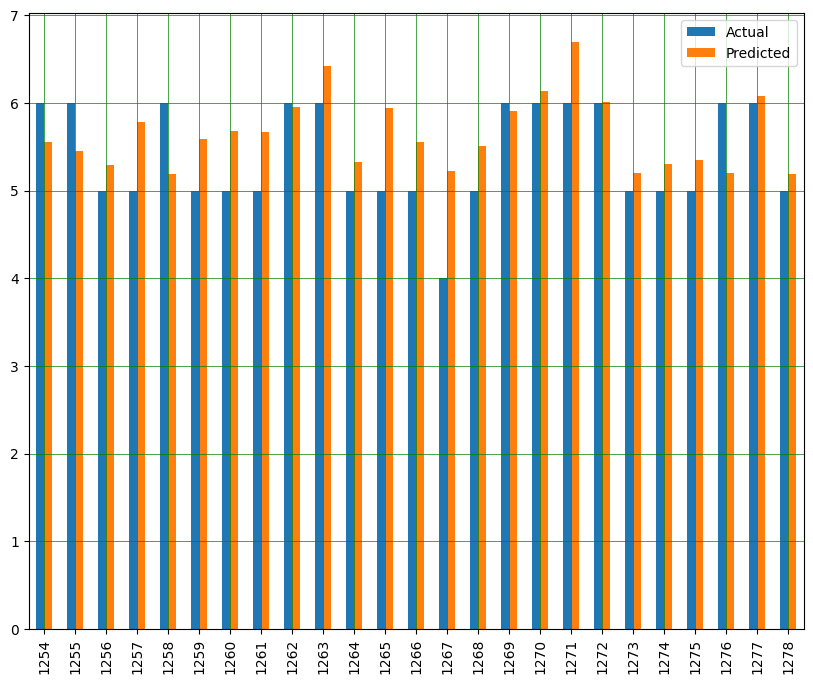

In [34]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

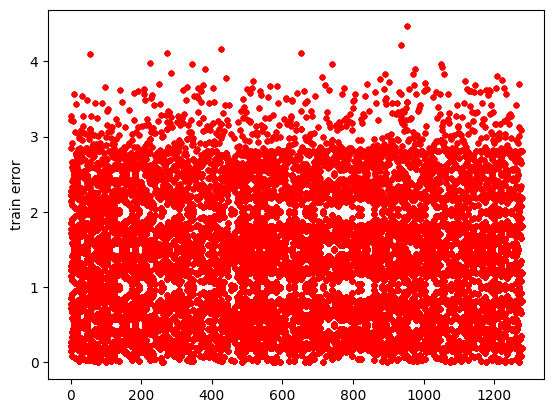

In [35]:
plt.plot(train_error,'r.')
plt.ylabel('train error')
plt.show()

In [36]:
# testing the model with the test data
prediction = estimator.predict(X_test)

test_error =  np.abs(Y_test - prediction)
mean_error = np.mean(test_error)
min_error = np.min(test_error)
max_error = np.max(test_error)
std_error = np.std(test_error)
print('\nTesting results:\nmean=',mean_error,'\nmin=',min_error,'\nmax=',max_error,'\nstd=',std_error)
#errors_900e = {'mean_error': 0.7007251550443471, 'min_error': 1.5735626220703125e-05, 'max_error': 3.922793388366699, 'std_error': 0.5148064770400209}
#errors_1400e = {'mean_error': 0.7270655311644078, 'min_error': 0.0018200874328613281, 'max_error': 4.023706912994385, 'std_error': 0.5358871572458632}
#errors_1400e = {'mean_error': 0.8038451662939042, 'min_error': 0.0008792877197265625, 'max_error': 4.840633392333984, 'std_error': 0.6056768089286081}
#errors_900_extra_layers = {'mean_error': 0.7420202064048499, 'min_error': 0.0012807846069335938, 'max_error': 4.206390380859375, 'std_error': 0.5559694026918213}
#errors_900_extra_layers = {'mean_error': 0.7817482182569802, 'min_error': 0.0011377334594726562, 'max_error': 4.72584342956543, 'std_error': 0.611240116959991}
#errors_900e = {'mean_error': 0.7111849143449217, 'min_error': 0.0010228157043457031, 'max_error': 4.097700595855713, 'std_error': 0.5257063529485498}

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Testing results:
mean= 0.7111849143449217 
min= 0.0010228157043457031 
max= 4.097700595855713 
std= 0.5257063529485498


In [37]:
# and showing the results
df = pd.DataFrame({'Actual': Y_test, 'Predicted': prediction.ravel() })
df1 = df.tail(25)
print(df1)

     Actual  Predicted
295     6.0   5.979338
296     6.0   5.923771
297     5.0   5.995678
298     6.0   5.277543
299     5.0   5.411070
300     6.0   5.647321
301     5.0   5.186041
302     6.0   5.854438
303     6.0   6.174619
304     6.0   6.311025
305     6.0   5.957715
306     5.0   5.392288
307     5.0   5.285787
308     6.0   5.624618
309     5.0   5.852625
310     5.0   5.602600
311     6.0   6.142534
312     5.0   5.761827
313     5.0   5.619351
314     5.0   5.188323
315     6.0   6.158493
316     4.0   6.124530
317     5.0   6.366123
318     4.0   5.214279
319     6.0   6.190661


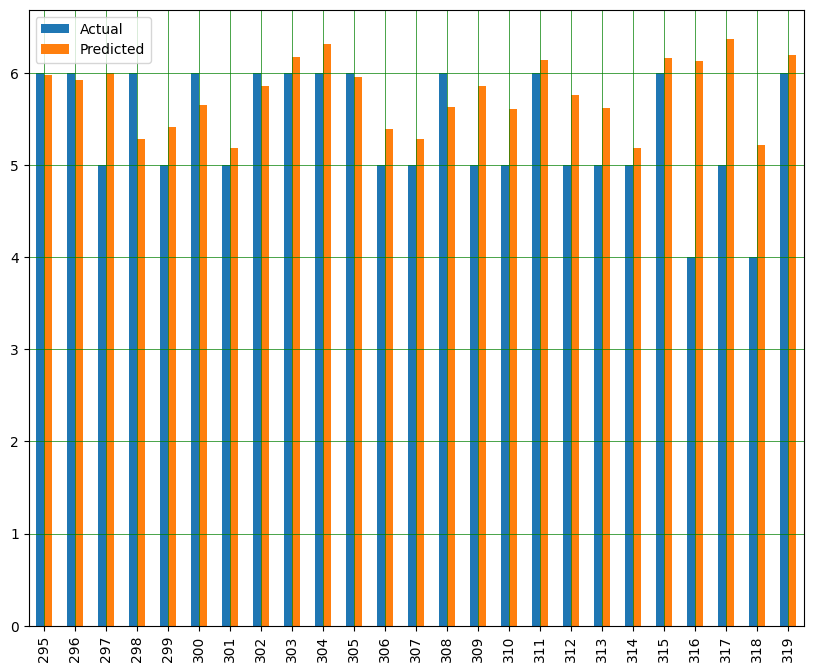

In [38]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

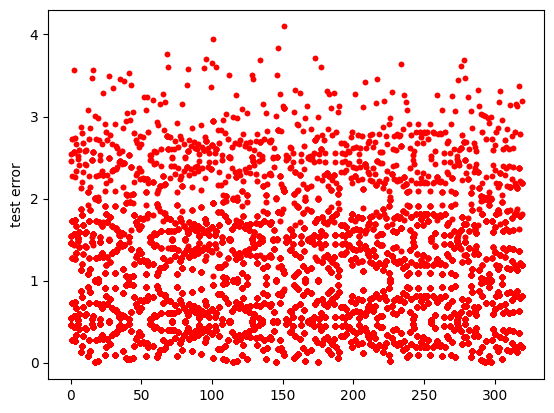

In [39]:
plt.plot(test_error,'r.')
plt.ylabel('test error')
plt.show()

##  Practices
1. train the model for 1400 epochs. what are the training and testing MAE?
2. repeat that with 6000 training epochs. what are the training and testing MAE?
3. move back to 900 training epochs. add two convolutional and one dense layer with the same features of the layers used. what are the training and testing MAE?
4. go for 6000 training epochs. Do you feel any overfitting?
5. set back everything to the original setting, then try to normalize the training and testing features and outputs using standard_scaler. Then see if anything gets better or not. You may use insttructions like what you can see in the next cell.  

#### points:
- use GPU as your runtime type
- if the notebook overflows, change the verbose to 0, e.g. verbose=0 in the training cell.

In [ ]:
'''
# normalization
from sklearn.preprocessing import StandardScaler

# Create scalers
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Standardize X_train and X_test
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize Y_train and Y_test (only if y is continuous, e.g., in regression)
y_train_scaled = scaler_y.fit_transform(Y_train.reshape(-1, 1))  # Reshape if needed
y_test_scaled = scaler_y.transform(Y_test.reshape(-1, 1))
'''

'\n# normalization\nfrom sklearn.preprocessing import StandardScaler\n\n# Create scalers\nscaler_X = StandardScaler()\nscaler_y = StandardScaler()\n\n# Standardize X_train and X_test\nX_train_scaled = scaler_X.fit_transform(X_train)\nX_test_scaled = scaler_X.transform(X_test)\n\n# Standardize Y_train and Y_test (only if y is continuous, e.g., in regression)\ny_train_scaled = scaler_y.fit_transform(Y_train.reshape(-1, 1))  # Reshape if needed\ny_test_scaled = scaler_y.transform(Y_test.reshape(-1, 1))\n'